## Hidrometer

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.formula.api import ols
import streamlit as st

In [13]:
data_fields = [
    "applicationID", "applicationName", "data_boardVoltage", "data_counter", 
    "devEUI", "fCnt", "fPort", "host", "nodeName", "rxInfo_altitude_0", 
    "rxInfo_altitude_1", "rxInfo_latitude_0", "rxInfo_latitude_1", 
    "rxInfo_loRaSNR_0", "rxInfo_loRaSNR_1", "rxInfo_longitude_0", 
    "rxInfo_longitude_1", "rxInfo_mac_0", "rxInfo_mac_1", "rxInfo_name_0", 
    "rxInfo_name_1", "rxInfo_rssi_0", "rxInfo_rssi_1", "time", "txInfo_adr", 
    "txInfo_codeRate", "txInfo_dataRate_bandwidth", "txInfo_dataRate_modulation", 
    "txInfo_dataRate_spreadFactor", "txInfo_frequency"
]

df_hidrometer = pd.read_csv(r'data/Hidrometer.csv', header=3, usecols=data_fields)
df_hidrometer["time"] = pd.to_datetime(df_hidrometer["time"])


In [14]:
dfs_hidrometer_per_node = {app_id: df_node for app_id, df_node in df_hidrometer.groupby("devEUI")}
ids = list(dfs_hidrometer_per_node.keys())

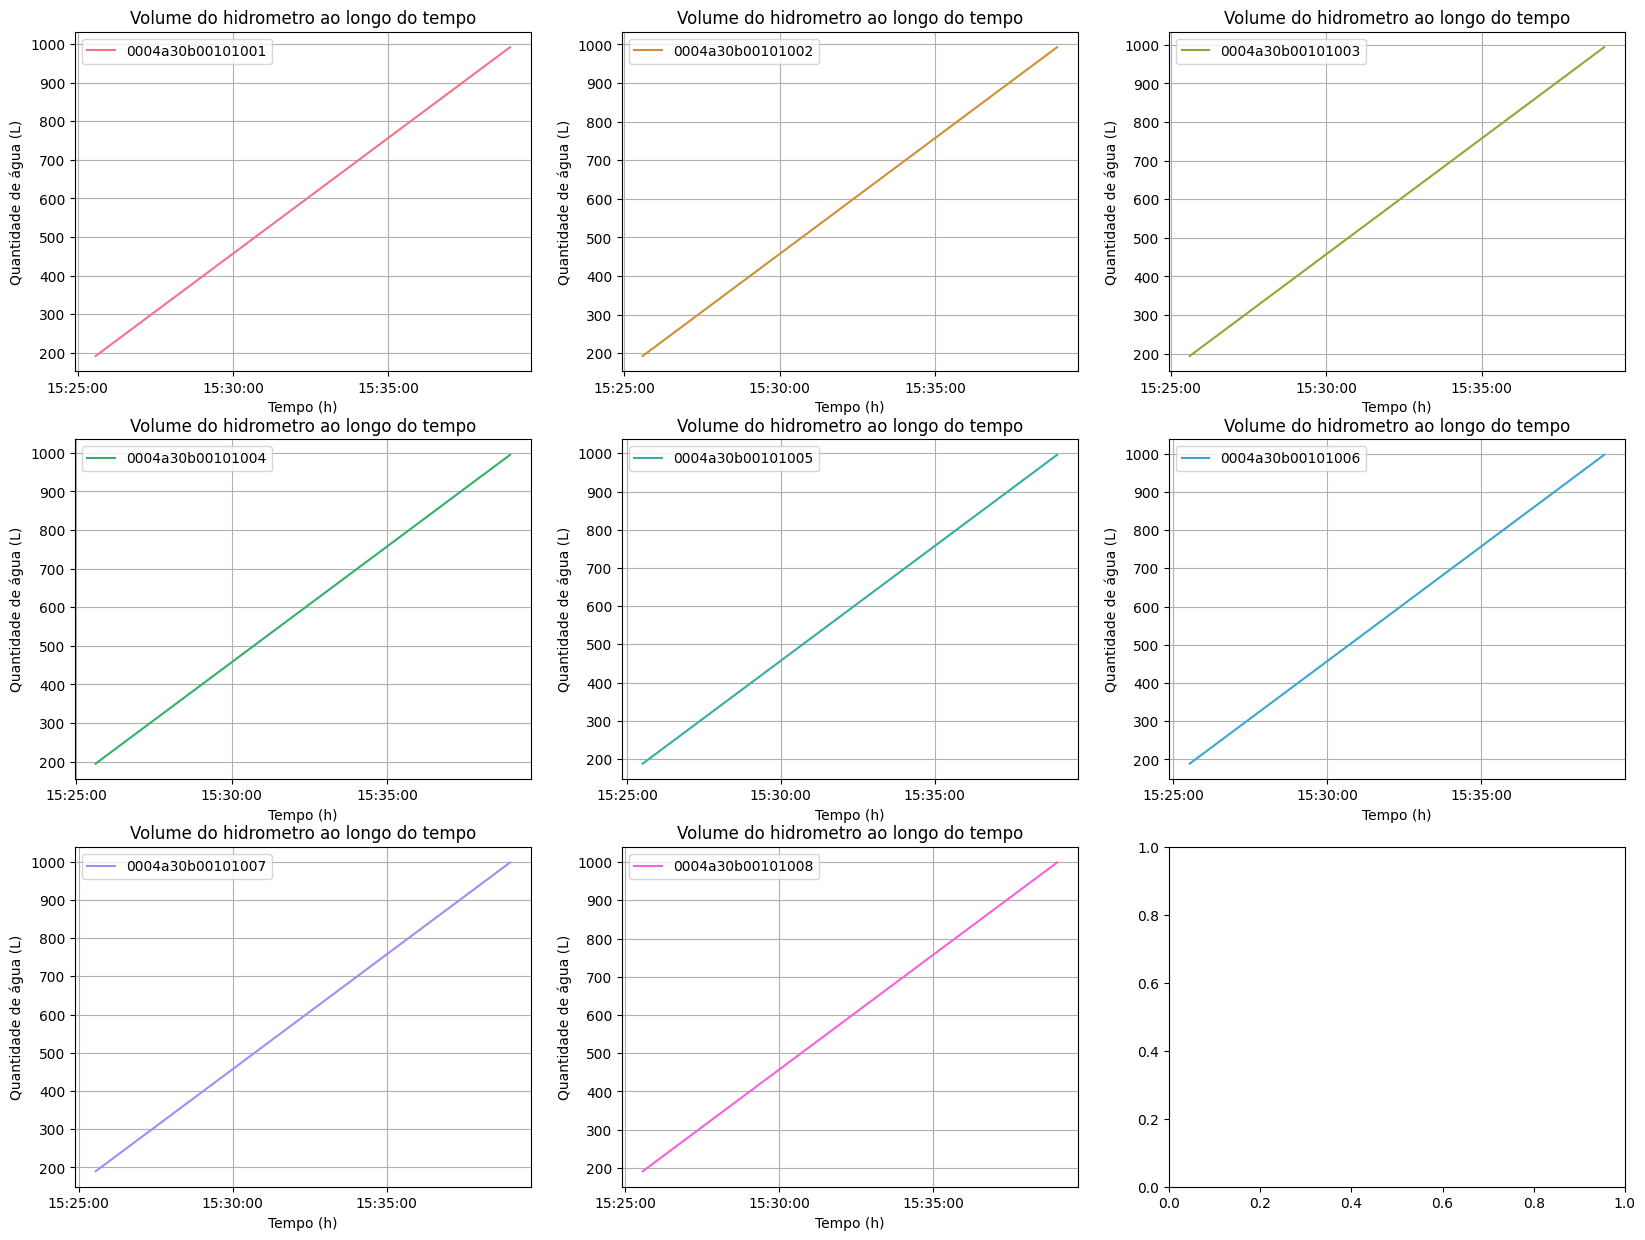

In [28]:
colors = sns.color_palette("husl", len(ids))

ncols = 3
nrows = (len(ids) + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, nrows*5))
axes = axes.flatten()
for ax, id in zip(axes,ids):
    df_hidrometer = dfs_hidrometer_per_node[id]
    sns.lineplot(ax=ax, x="time", y="data_counter", data=df_hidrometer, label=id, color=colors.pop(0))
    ax.set_xlabel("Tempo (h)")
    ax.set_ylabel("Quantidade de água (L)")
    ax.set_title("Volume do hidrometro ao longo do tempo") 
    ax.legend(loc='upper left')
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.grid(True)
st.pyplot(plt.gcf())

In [27]:
data_volume = []
print("Intervalo de tempo total: {:.2f}".format((df_hidrometer["time"].max() - df_hidrometer["time"].min()).total_seconds()/60))
for id in ids:
    max_volume = dfs_hidrometer_per_node[id]["data_counter"].max()
    min_volume = dfs_hidrometer_per_node[id]["data_counter"].min()

    data_volume.append([id, max_volume, min_volume])

df_estatisticas = pd.DataFrame(data_volume, columns=["Device ID", "Max Volume", "Min Volume"])
df_estatisticas

Intervalo de tempo total: 13.47


,Device ID,Max Volume,Min Volume
0,0004a30b00101001,992,192
1,0004a30b00101002,993,193
2,0004a30b00101003,994,194
3,0004a30b00101004,995,195
4,0004a30b00101005,996,188
5,0004a30b00101006,997,189
6,0004a30b00101007,998,190
7,0004a30b00101008,999,191
